# Overview
The following notebook is divided into the following parts:
- Preparation: Filepaths can be given for the inputs and outputs. Settings can be chosen for the following steps.
- Preprocessing: Adapt the images to the later steps through filters
- Distance computation: Normally done by feature detection, followed by feature matching, followed by distance score computation.
- Clustering: Compute a clustering from the beforehand computed distances.

# Preparation

In [3]:
# Import
import sys
import os

module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Preprocessing
from joblib import Parallel, delayed
import utils
from utils import grayscale_directory, clahe_directory, apply_denoise_tv_chambolle_directory, circle_crop_directory, create_comparison_file, analyseClustering

# Distance computing
from kornia_matcher import extract_kornia_matches_in_directory
import pandas as pd

# Clustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan

In [7]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Variables
import variables



## Preprocessing obverse
exp1_obverse = os.path.join(variables.results_directory_obverse, "01_grayscale") # variables.results_directory+"01_grayscale\\"
exp2_obverse = os.path.join(variables.results_directory_obverse, "02_histogram_equalization")
exp3_obverse = os.path.join(variables.results_directory_obverse, "03_denoise")
exp4_obverse = os.path.join(variables.results_directory_obverse, "04_histogram_equalization")
exp5_obverse = os.path.join(variables.results_directory_obverse, "05_circle_crop")
folders_obverse = [exp1_obverse, exp2_obverse, exp3_obverse, exp4_obverse, exp5_obverse]

preprocessed_images_path_obverse = exp5_obverse
images_folder_path_obverse = variables.images_directory_obverse

## Distance computing obverse
matching_file_path_obverse = variables.results_directory_obverse + variables.matching_file_name_obverse
clustering_file_path_obverse = variables.results_directory_obverse + variables.clustering_file_name_obverse
#graph_file_path = variables.results_directory + variables.graph_file_name

## Preprocessing reverse
exp1_reverse = os.path.join(variables.results_directory_reverse, "01_grayscale") # variables.results_directory+"01_grayscale\\"
exp2_reverse = os.path.join(variables.results_directory_reverse, "02_histogram_equalization")
exp3_reverse = os.path.join(variables.results_directory_reverse, "03_denoise")
exp4_reverse = os.path.join(variables.results_directory_reverse, "04_histogram_equalization")
exp5_reverse = os.path.join(variables.results_directory_reverse, "05_circle_crop")
folders_reverse = [exp1_reverse, exp2_reverse, exp3_reverse, exp4_reverse, exp5_reverse]

preprocessed_images_path_reverse = exp5_reverse
images_folder_path_reverse = variables.images_directory_reverse

## Distance computing obverse
matching_file_path_reverse = variables.results_directory_reverse + variables.matching_file_name_reverse
clustering_file_path_reverse = variables.results_directory_reverse + variables.clustering_file_name_reverse
#graph_file_path = variables.results_directory + variables.graph_file_name
## Clustering
# linkage option: "complete", "average"
clusterer = AgglomerativeClustering(n_clusters=variables.number_of_clusters, linkage='complete', metric='precomputed')  
#clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)

# Preprocessing
See the Preprocessing notebook for more in depth information

In [7]:
if not os.path.exists(variables.results_directory_obverse):
    os.mkdir(variables.results_directory_obverse)
for folder in folders_obverse:
    if not os.path.exists(folder):
        os.mkdir(folder)
        
if not os.path.exists(variables.results_directory_reverse):
    os.mkdir(variables.results_directory_reverse)
for folder in folders_reverse:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [9]:
grayscale_directory(variables.images_directory_obverse, exp1_obverse)
grayscale_directory(variables.images_directory_reverse, exp1_reverse)

In [10]:
clahe_directory(exp1_obverse, exp2_obverse)
clahe_directory(exp1_reverse, exp2_reverse)

In [11]:
apply_denoise_tv_chambolle_directory(exp2_obverse, exp3_obverse, weight=0.5)
apply_denoise_tv_chambolle_directory(exp2_reverse, exp3_reverse, weight=0.5)

In [12]:
clahe_directory(exp3_obverse, exp4_obverse)
clahe_directory(exp3_reverse, exp4_reverse)

In [13]:
circle_crop_directory(exp4_obverse, exp5_obverse)
circle_crop_directory(exp4_reverse, exp5_reverse)

# Distance computation

## Feature Detection and Description

In [1]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
Device name: NVIDIA GeForce RTX 3070 Ti


In [32]:
distances_obverse = extract_kornia_matches_in_directory(preprocessed_images_path_obverse, method=22, print_log=True)
distances_obverse.to_csv(matching_file_path_obverse)
distances_reverse = extract_kornia_matches_in_directory(preprocessed_images_path_reverse, method=22, print_log=True)
distances_reverse.to_csv(matching_file_path_reverse)

cuda:0
Matching Handler started with device cuda:0.
Matching Handler now using method 22: dete_and_dest SIFTFeature.
1 / 566
2 / 566
3 / 566
4 / 566
5 / 566
6 / 566
7 / 566
8 / 566
9 / 566
10 / 566
11 / 566
12 / 566
13 / 566
14 / 566
15 / 566
16 / 566
17 / 566
18 / 566
19 / 566
20 / 566
21 / 566
22 / 566
23 / 566
24 / 566
25 / 566
26 / 566
27 / 566
28 / 566
29 / 566
30 / 566
31 / 566
32 / 566
33 / 566
34 / 566
35 / 566
36 / 566
37 / 566
38 / 566
39 / 566
40 / 566
41 / 566
42 / 566
43 / 566
44 / 566
45 / 566
46 / 566
47 / 566
48 / 566
49 / 566
50 / 566
51 / 566
52 / 566
53 / 566
54 / 566
55 / 566
56 / 566
57 / 566
58 / 566
59 / 566
60 / 566
61 / 566
62 / 566
63 / 566
64 / 566
65 / 566
66 / 566
67 / 566
68 / 566
69 / 566
70 / 566
71 / 566
72 / 566
73 / 566
74 / 566
75 / 566
76 / 566
77 / 566
78 / 566
79 / 566
80 / 566
81 / 566
82 / 566
83 / 566
84 / 566
85 / 566
86 / 566
87 / 566
88 / 566
89 / 566
90 / 566
91 / 566
92 / 566
93 / 566
94 / 566
95 / 566
96 / 566
97 / 566
98 / 566
99 / 566
1

In [4]:
# Save distances to file
df2 = pd.read_csv(matching_file_path_obverse)
paths = utils.get_paths(images_folder_path_obverse)
df2 = utils.add_path_to_df(df2, paths)
df2.to_csv(matching_file_path_obverse)

df2 = pd.read_csv(matching_file_path_reverse)
paths = utils.get_paths(images_folder_path_reverse)
df2 = utils.add_path_to_df(df2, paths)
df2.to_csv(matching_file_path_reverse)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\edvin\\Desktop\\DataChallenge\\DataChallenge2025_bueschelquinare\\obverse_results\\obverse_matching_obverse.csv'

# Clustering

In [5]:
clustering_obverse = utils.compute_clustering("C:\\Users\\edvin\\Desktop\\DataChallenge\\DieStudyTool-main\\DieStudyTool-main\\obverse_resultsmatching_obverse.csv", clusterer = clusterer, distance_function=variables.distance_computation_method)
clustering_obverse.to_csv(clustering_file_path_obverse)

clustering_reverse = utils.compute_clustering("C:\\Users\\edvin\\Desktop\\DataChallenge\\DieStudyTool-main\\DieStudyTool-main\\reverse_resultsmatching_reverse.csv", clusterer = clusterer, distance_function=variables.distance_computation_method)
clustering_reverse.to_csv(clustering_file_path_reverse)
#paths = utils.get_paths(images_folder_path)
#clustering2 = utils.add_path_to_df(clustering, paths, name_column='object_number', set_index=False)
#clustering2.to_csv(clustering_file_path)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [51]:
from utils import DistanceFunctionHUB
data_file = pd.read_csv("obverse_3matching_obverse_3.csv")
	
number_of_images = -1
if(number_of_images > 0):
    distance_score_file = data_file.iloc[
        :number_of_images,:number_of_images+1].set_index("name")
else:
    distance_score_file = data_file.iloc[:,:-1].set_index("name")

# Precompute the spearman distances to give to the algorithm
computed_distances = DistanceFunctionHUB.forward(
    distance_score_file, 2)


In [44]:
clusterer_rev = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=3, gen_min_span_tree=True)
clusterer_rev.fit(computed_distances)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=2, min_samples=3)

<Axes: >

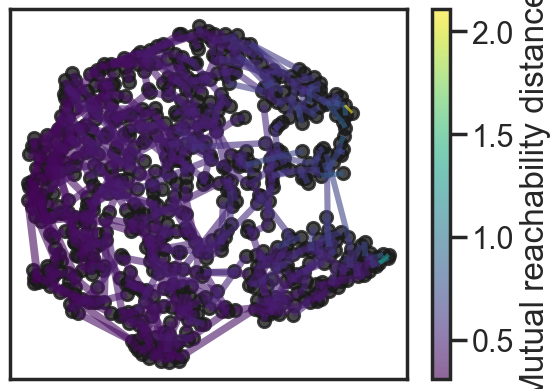

In [45]:
clusterer_rev.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='distance'>

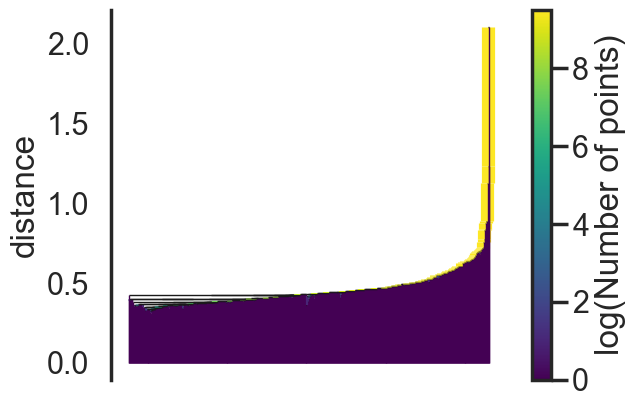

In [46]:
clusterer_rev.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

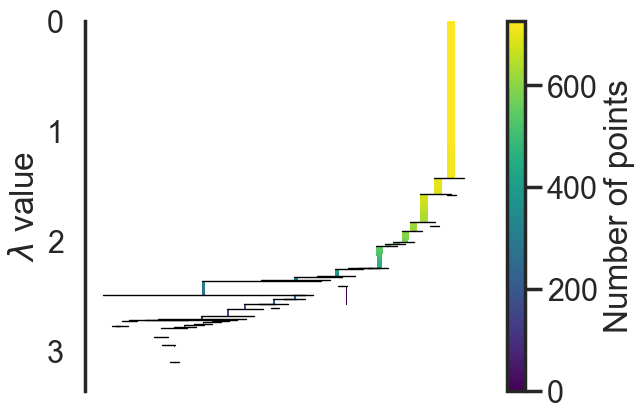

In [47]:
clusterer_rev.condensed_tree_.plot()

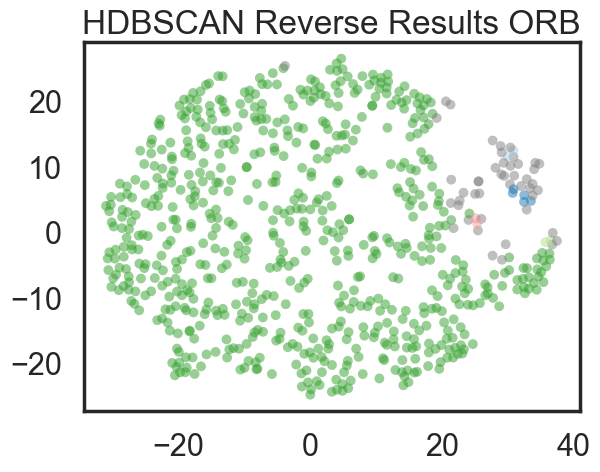

In [55]:
from sklearn.manifold import TSNE
projection = TSNE().fit_transform(computed_distances)

clusterer_rev = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=3, prediction_data=True).fit(computed_distances)
color_palette = sns.color_palette('Paired', len(clusterer_rev.labels_))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer_rev.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer_rev.probabilities_)]
plt.title("HDBSCAN Reverse Results ORB")
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

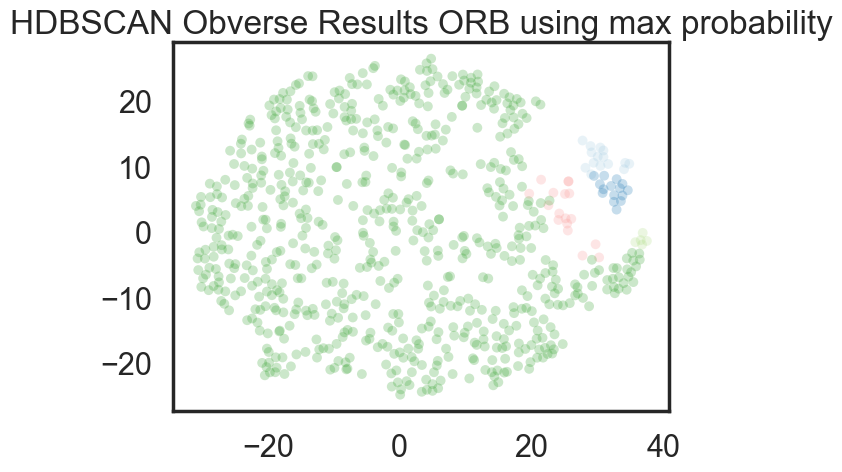

In [54]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer_rev)
color_palette = sns.color_palette('Paired', len(clusterer_rev.labels_))
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.title("HDBSCAN Obverse Results ORB using max probability")
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

c:\Users\edvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
c:\Users\edvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


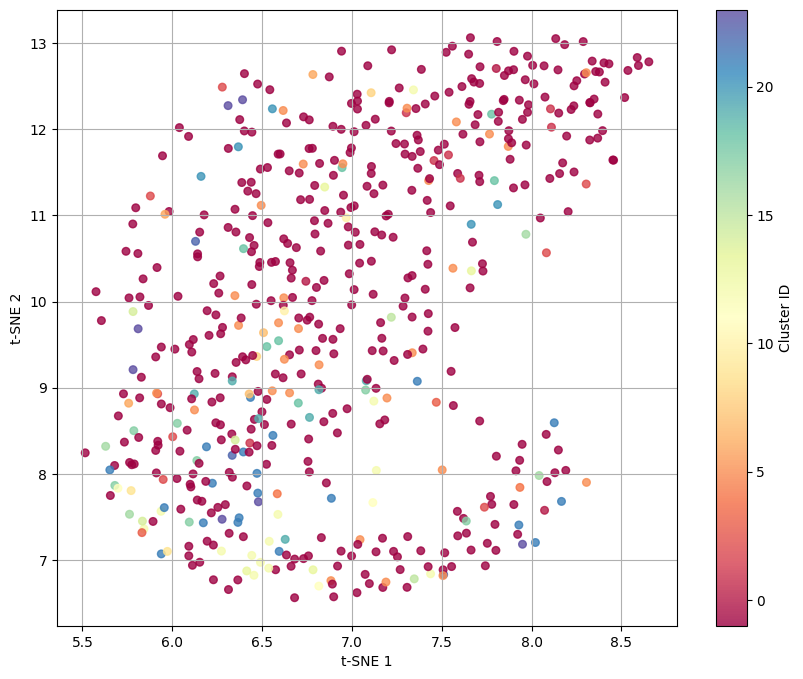

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import umap

# Re-load the actual distance matrix (not similarity)
distance_matrix_path = "reverse_resultsmatching.csv"
dist_matrix_df = pd.read_csv(distance_matrix_path, index_col=0)

# Check for and drop any non-numeric columns
if "path" in dist_matrix_df.columns:
    dist_matrix_df = dist_matrix_df.drop(columns=["path"])

distance_matrix = dist_matrix_df.values
distance_labels = dist_matrix_df.index.tolist()

# Load clustering labels
clustering_result_path = "reverse_resultsclustering_reverse_4_2_50.csv"
clustering_df = pd.read_csv(clustering_result_path).set_index("object_number")

if "path" in clustering_df.columns:
    clustering_df = dist_matrix_df.drop(columns=["path"])

# Match clustering labels to matrix order
cluster_labels = clustering_df.loc[distance_labels, "final_obverse_CL"].values

# Apply t-SNE directly to the distance matrix
#tsne = TSNE(metric="precomputed", init="random", perplexity=30, random_state=42)

#embedding = tsne.fit_transform(distance_matrix)

embedding = umap.UMAP(metric='precomputed', random_state=42).fit_transform(distance_matrix)


# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=cluster_labels,
    cmap='Spectral',
    s=30,
    alpha=0.8
)
#plt.title("HDBSCAN Clustering (t-SNE from Distance Matrix)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter, label="Cluster ID")
plt.grid(True)
plt.show()


# Evaluation

In [17]:
if variables.ground_truth_file != "":
    # Comparison file for graph visualization (applying clustering)

    name = os.path.splitext(os.path.basename(clustering_file_path))[0]
    
    create_comparison_file(
        [matching_file_path], 
        [name], 
        1, 
        variables.number_of_clusters, 
        target_file=graph_file_path, 
        number_of_images=-1,
        true_values_file = variables.ground_truth_file,
        distance_function=[variables.distance_computation_method], 
        clusterers = [clusterer])
    
    plot_dataframe = pd.concat([pd.read_csv(graph_file_path).iloc[:, [1,2,3]]]) # , pd.read_csv("max_possible_values.csv").iloc[:50, 1:3]
    plot = plot_dataframe.plot(title="Distancefunction comparison")
    print(plot)

TypeError: 'builtin_function_or_method' object is not iterable

In [18]:
if variables.ground_truth_file != "":
    analyseClustering(matching_file_path, 
                  variables.ground_truth_file, 
                  distance_function=variables.distance_computation_method,
                  side=True,
                  clusterer=clusterer)

FileNotFoundError: [Errno 2] No such file or directory: '/home/student_01/Projects/Datasets/MA_Fiedler_coins_datasets/Stater_VI/class VI final list.xlsx'